In [ ]:
import os
from fmlib.io import zenodo_get_and_unzip, load_fusions_from_fusionaitxt
from pathlib import Path
import pandas as pd
import os
import ai


data_folder = Path('download/dataset')
if not os.path.exists(data_folder):
    os.makedirs(data_folder)
    zenodo_get_and_unzip('15655666','dataset.zip','download')

nt_train = ai.load_fusion_embedings(data_folder/'nt_train_seq1.csv', data_folder/'nt_train_seq2.csv', data_folder/'fusionai_train_target.csv')
evo_train = ai.load_fusion_embedings(data_folder/'evo_train_seq1.csv', data_folder/'evo_train_seq2.csv', data_folder/'fusionai_train_target.csv')
hyena_train = ai.load_fusion_embedings(data_folder/'hyena_train_seq1.csv', data_folder/'hyena_train_seq2.csv', data_folder/'fusionai_train_target.csv')
bert_train = ai.load_fusion_embedings(data_folder/'bert_train_seq1.csv', data_folder/'bert_train_seq2.csv', data_folder/'fusionai_train_target.csv')


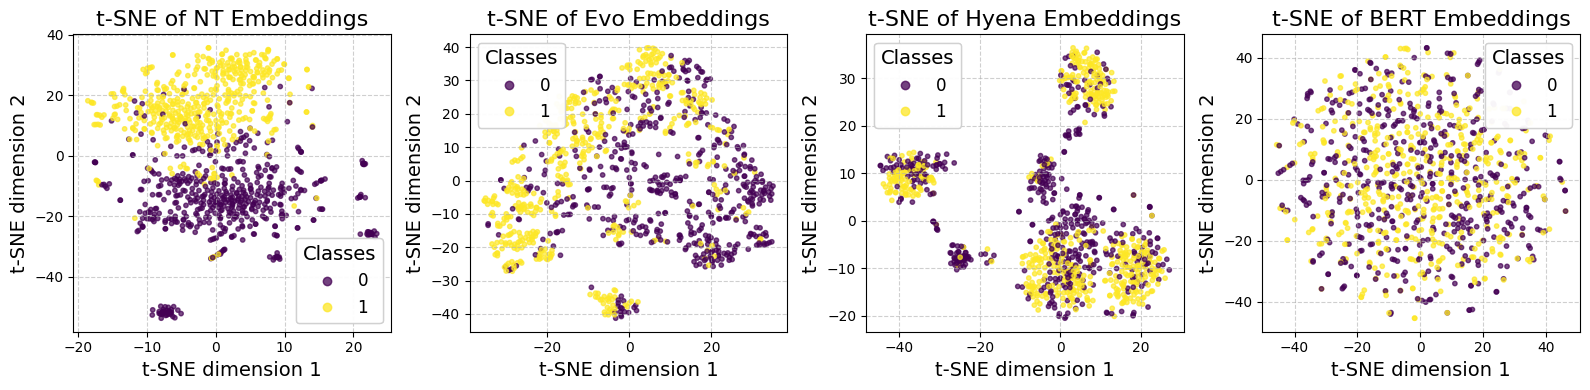

In [3]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

# Extract vectors and responses for each model
nt_train_vector = nt_train[0]
nt_response = np.argmax(nt_train[1], axis=1)
evo_train_vector = evo_train[0]
evo_response = np.argmax(evo_train[1], axis=1)
hyena_train_vector = hyena_train[0]
hyena_response = np.argmax(hyena_train[1], axis=1)
bert_train_vector = bert_train[0]
bert_response = np.argmax(bert_train[1], axis=1)

# Combine data for t-SNE processing
embeddings = {
    'NT': nt_train_vector,
    'Evo': evo_train_vector,
    'Hyena': hyena_train_vector,
    'BERT': bert_train_vector
}
responses = {
    'NT': nt_response,
    'Evo': evo_response,
    'Hyena': hyena_response,
    'BERT': bert_response
}

# Initialize t-SNE
tsne = TSNE(n_components=2, random_state=42)

# Create 2x2 subplots
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
axes = axes.ravel()

# Generate and plot t-SNE for each embedding
for i, (name, vector) in enumerate(embeddings.items()):
    # To speed up, let's use a subset of the data for t-SNE
    sample_size = 1000
    indices = np.random.choice(vector.shape[0], sample_size, replace=False)
    
    tsne_results = tsne.fit_transform(vector[indices])
    ax = axes[i]
    scatter = ax.scatter(tsne_results[:, 0], tsne_results[:, 1], c=responses[name][indices], cmap='viridis', alpha=0.7, s=10)
    
    # Set titles and labels with increased font size for publication
    ax.set_title(f't-SNE of {name} Embeddings', fontsize=16)
    ax.set_xlabel('t-SNE dimension 1', fontsize=14)
    ax.set_ylabel('t-SNE dimension 2', fontsize=14)
    
    # Add a grid
    ax.grid(True, linestyle='--', alpha=0.6)
    
    # Create and customize the legend
    legend1 = ax.legend(*scatter.legend_elements(), title="Classes", fontsize=12)
    legend1.get_title().set_fontsize('14') # Set legend title font size
    ax.add_artist(legend1)

plt.tight_layout()
# Save the figure for publication in both vector (SVG) and raster (PNG) formats
# plt.savefig('tsne_embeddings_comparison.svg', format='svg', bbox_inches='tight')
# plt.savefig('tsne_embeddings_comparison.png', dpi=300, bbox_inches='tight')

plt.show()


In [4]:
import pickle


# Define prefixes and file paths
prefixes = ['fusionai', 'nt', 'evo', 'hyena', 'bert']

results = {}
histories = {}

for prefix in prefixes:
    # Load results
    results_path = f'download/learned_models_nn/{prefix}_results_36302.pkl'
    print(f"Loading results from: {results_path}")
    with open(results_path, 'rb') as f:
        results[f'{prefix}_nn'] = pickle.load(f)

for prefix in prefixes:
    # Load histories
    history_path = f'download/learned_models_nn/{prefix}_history_36302.pkl'
    print(f"Loading history from: {history_path}")
    with open(history_path, 'rb') as f:
        histories[prefix] = pickle.load(f)
            
for prefix in prefixes[1:]:
    results_path = f'download/learned_models_svm/{prefix}_svm_rbf.pkl'
    with open(results_path, 'rb') as f:
        results[f'{prefix}_svm'] = pickle.load(f)



print("Loaded results and histories for prefixes:", prefixes)


# Create a DataFrame for better visualization




Loading results from: download/learned_models_nn/fusionai_results_36302.pkl
Loading results from: download/learned_models_nn/nt_results_36302.pkl
Loading results from: download/learned_models_nn/evo_results_36302.pkl
Loading results from: download/learned_models_nn/hyena_results_36302.pkl
Loading results from: download/learned_models_nn/bert_results_36302.pkl
Loading history from: download/learned_models_nn/fusionai_history_36302.pkl
Loading history from: download/learned_models_nn/nt_history_36302.pkl
Loading history from: download/learned_models_nn/evo_history_36302.pkl
Loading history from: download/learned_models_nn/hyena_history_36302.pkl
Loading history from: download/learned_models_nn/bert_history_36302.pkl
Loaded results and histories for prefixes: ['fusionai', 'nt', 'evo', 'hyena', 'bert']


/tmp/ipykernel_166588/2294390895.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f"{tick:.2f}" for tick in ax.get_yticks()], fontsize=14)


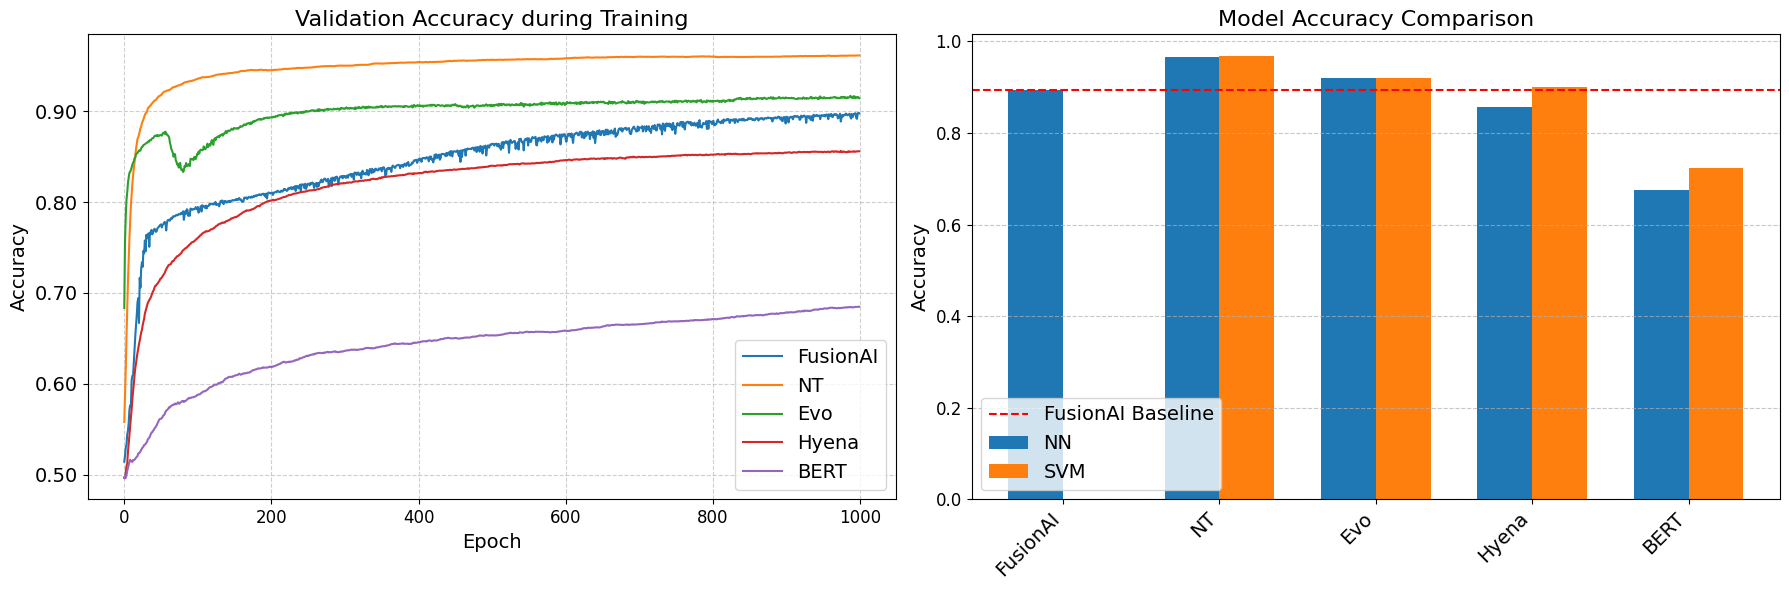


Model Evaluation Summary Table:


,Accuracy,Precision,Recall,F1 Score,ROC AUC
fusionai_nn,0.894,0.894,0.894,0.894,0.960
nt_nn,0.966,0.966,0.966,0.966,0.994
nt_svm,0.967,0.972,0.962,0.967,0.995
evo_nn,0.920,0.920,0.920,0.920,0.970
evo_svm,0.920,0.920,0.920,0.920,0.975
hyena_nn,0.857,0.858,0.857,0.857,0.936
hyena_svm,0.900,0.880,0.925,0.902,0.962
bert_nn,0.677,0.678,0.677,0.676,0.745
bert_svm,0.723,0.737,0.690,0.713,0.799


<Figure size 640x480 with 0 Axes>

In [5]:
import numpy as np

import matplotlib.pyplot as plt

evaluation_df = pd.DataFrame.from_dict(results, orient='index')
# Normalize accuracy to be in [0, 1] range
evaluation_df['Accuracy'] = evaluation_df['Accuracy'].apply(lambda x: x / 100 if x > 1 else x)
model_names = ['FusionAI','NT', 'Evo', 'Hyena','BERT','SVM']


def plot_validation_accuracy(ax, histories_dict, model_names):
    """Plots validation accuracy on a given Axes object."""
    history_objs = list(histories_dict.values())
    for i, history in enumerate(history_objs):
        if 'val_accuracy' in history.history:
            ax.plot(history.history['val_accuracy'], label=f'{model_names[i]}')
    ax.set_title('Validation Accuracy during Training', fontsize=16)
    ax.set_xlabel('Epoch', fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.tick_params(axis='both', which='minor', labelsize=10)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_yticklabels([f"{tick:.2f}" for tick in ax.get_yticks()], fontsize=14)
    ax.legend(fontsize=14)
    ax.grid(True, linestyle='--', alpha=0.6)
    

def plot_accuracy_bar(ax, evaluation_df, model_names, prefixes):
    """Plots a grouped bar chart of model accuracies on a given Axes object."""
    nn_accuracies = []
    svm_accuracies = []

    for prefix in prefixes:
        nn_accuracies.append(evaluation_df.loc[f'{prefix}_nn', 'Accuracy'])
        svm_key = f'{prefix}_svm'
        if svm_key in evaluation_df.index:
            svm_accuracies.append(evaluation_df.loc[svm_key, 'Accuracy'])
        else:
            svm_accuracies.append(0) # Use 0 for missing SVM models for plotting

    x = np.arange(len(prefixes))
    width = 0.35

    rects1 = ax.bar(x - width/2, nn_accuracies, width, label='NN')
    rects2 = ax.bar(x + width/2, svm_accuracies, width, label='SVM')

    # Add a horizontal line for the first model's accuracy as a baseline
    if nn_accuracies:
        baseline_accuracy = nn_accuracies[0]
        ax.axhline(y=baseline_accuracy, color='r', linestyle='--', label=f'{model_names[0]} Baseline')

    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_title('Model Accuracy Comparison', fontsize=16)
    ax.set_xticks(x)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.tick_params(axis='both', which='minor', labelsize=10)
    ax.set_xticklabels(model_names[:len(prefixes)], rotation=45, ha="right", fontsize=14)
    ax.legend(fontsize=14, loc='lower left')
    ax.grid(axis='y', linestyle='--', alpha=0.7)
     # Adjust ylim to focus on the relevant accuracy range
    




# --- Main Execution ---

# Define the order for displaying results
ordered_index = [
    'fusionai_nn',
    'nt_nn','nt_svm',
    'evo_nn','evo_svm',
    'hyena_nn','hyena_svm',
    'bert_nn','bert_svm',

]

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Subplot 1: Validation Accuracy
plot_validation_accuracy(axes[0], histories, model_names)

# Subplot 2: Grouped Bar Plot for Model Accuracy Comparison
plot_accuracy_bar(axes[1], evaluation_df, model_names, prefixes)

plt.tight_layout()
plt.show()
plt.savefig('model_performance_comparison.svg', format='svg', bbox_inches='tight')
plt.savefig('model_performance_comparison.png', dpi=300, bbox_inches='tight')

# Display the evaluation summary table
print("\nModel Evaluation Summary Table:")
display(evaluation_df.loc[ordered_index, ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']].round(3))


fusionai: Estimated samples to reach 95% of final accuracy (84.95%) = 14200
nt: Estimated samples to reach 95% of final accuracy (91.75%) = 2581
evo: Estimated samples to reach 95% of final accuracy (87.35%) = 4461
hyena: Estimated samples to reach 95% of final accuracy (81.39%) = 10303
bert: Estimated samples to reach 95% of final accuracy (64.28%) = 21768


,SamplesNeeded,Accuracy_at_95pct_of_final,EfficiencyScore_at_95pct
fusionai,14200,0.849,9.352
nt,2581,0.918,12.294
evo,4461,0.874,10.942
hyena,10303,0.814,9.272
bert,21768,0.643,6.775


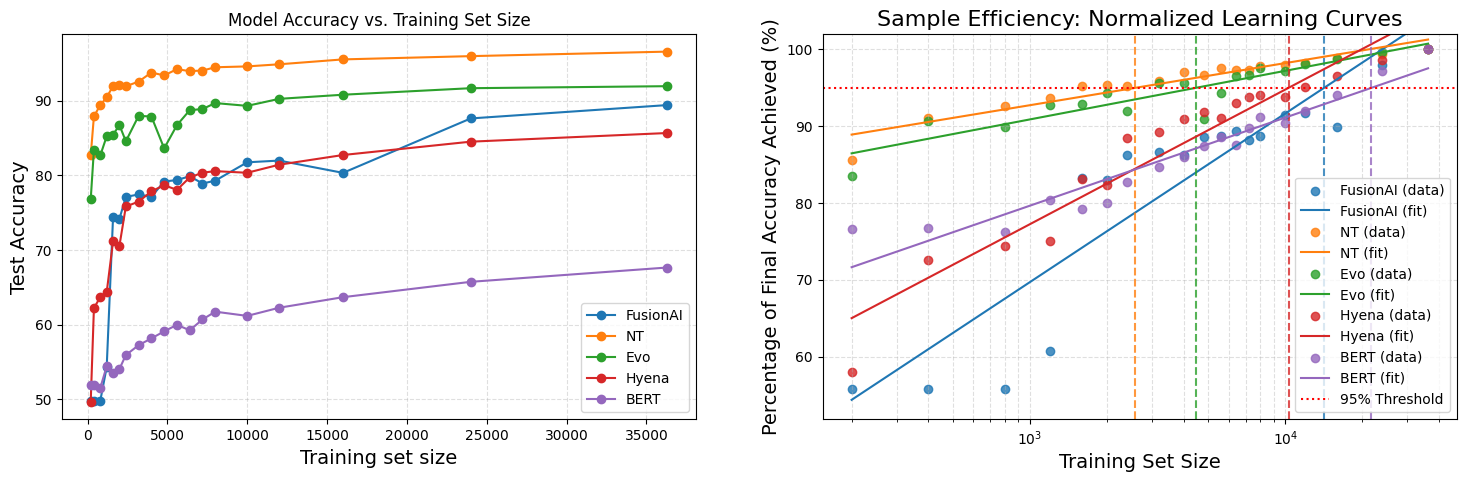

In [6]:
import torch
from scipy.optimize import curve_fit
# Iterative training with increasing nt_train data sizes
batch_sizes = [200, 400, 800, 1200, 1600, 2000, 2400,3200,4000,4800,5600,6400,7200, 8000,10000,12000, 16000, 24000,36302] #pridat 10000,12000
# Load nt_train and nt_test from download/results


# Initialize dictionary to store accuracies for each prefix
accuracies = {prefix: [] for prefix in prefixes}

for prefix in prefixes:
    for size in batch_sizes:
        result_path = f'download/learned_models_nn/{prefix}_results_{size}.pkl'
        if os.path.exists(result_path):
            with open(result_path, 'rb') as f:
                evaluation_results = pickle.load(f)
            accuracies[prefix].append(evaluation_results['Accuracy'])        
        else:
            accuracies[prefix].append(None)
            print(f"Result file not found for {prefix} batch size {size}: {result_path}")



# Define a logarithmic function to model the learning curve
# y = a * log(x) + b
# Use the more descriptive name 'training_sizes' as in the cell below



fig, axes = plt.subplots(1, 2, figsize=(18, 5))
ax = axes[0]
# Plot accuracy vs. training set size for each prefix

for prefix in prefixes:
    ax.plot(batch_sizes, accuracies[prefix], marker='o', label=model_names[prefixes.index(prefix)])
ax.set_xlabel('Training set size', fontsize=14)
ax.set_ylabel('Test Accuracy', fontsize=14)
ax.set_title('Model Accuracy vs. Training Set Size')
ax.legend()
ax.grid(True, which="both", ls="--", alpha=0.4)


###########################################################################################
## Sample Efficiency Analysis with Logarithmic Curve Fitting


def log_func(x, a, b):
    # Add a small constant to avoid log(0) or log(negative) if x is not strictly positive
    return a * np.log(x + 1e-9) + b

training_sizes = batch_sizes

ax = axes[1]
# --- Finalize Plot ---
samples_needed_for_95 = {}
samples_accuracy_for_95 = {}
samples_efficiency_score_for_95 = {}

# --- Process and Plot for Each Model ---
for i, prefix in enumerate(prefixes):
    # Filter out None values from accuracies
    valid_indices = [j for j, acc in enumerate(accuracies[prefix]) if acc is not None]
    if not valid_indices:
        continue
        
    sizes = np.array([training_sizes[j] for j in valid_indices])
    accs = np.array([accuracies[prefix][j] for j in valid_indices])

    # Fit the logarithmic function to the data
    try:
        params, _ = curve_fit(log_func, sizes, accs, maxfev=5000)
        a, b = params
    except RuntimeError:
        print(f"Could not fit a curve for {prefix}. Skipping.")
        continue

    # Get the final accuracy (accuracy at the largest dataset size)
    final_accuracy = accs[-1]
    
    # Normalize accuracy to 0-100% of the final accuracy
    normalized_accs = (accs / final_accuracy) * 100

    # Plot the original normalized data points
    ax.scatter(sizes, normalized_accs, label=f'{model_names[prefixes.index(prefix)]} (data)', alpha=0.8)

    # Generate points for the fitted curve
    fit_sizes = np.linspace(min(sizes), max(sizes), 500)
    fit_accs = log_func(fit_sizes, a, b)
    
    # Normalize the fitted curve
    normalized_fit_accs = (fit_accs / final_accuracy) * 100
    
    # Plot the normalized fitted curve
    ax.plot(fit_sizes, normalized_fit_accs, label=f'{model_names[prefixes.index(prefix)]} (fit)')

    # Calculate samples needed to reach 95% of final accuracy using the inverse of the log function
    target_accuracy = 0.95 * final_accuracy
    # Solve for x: target = a * log(x) + b  =>  x = exp((target - b) / a)
    samples_needed = np.exp((target_accuracy - b) / a)
    samples_needed_for_95[prefix] = samples_needed
    samples_accuracy_for_95[prefix] = target_accuracy
    samples_efficiency_score_for_95[prefix] = (final_accuracy / np.log(samples_needed))
    # Add a vertical line to show the 95% point
    color = ax.lines[-1].get_color()
    ax.axvline(x=samples_needed, linestyle='--', color=color, alpha=0.8)
    print(f"{prefix}: Estimated samples to reach 95% of final accuracy ({target_accuracy:.2f}%) = {int(samples_needed)}")

    # Build and display a summary table of estimated samples to reach 95%
try:
    df_samples = pd.DataFrame.from_dict(samples_needed_for_95, orient='index', columns=['SamplesNeeded'])
    df_samples['SamplesNeeded'] = df_samples['SamplesNeeded'].astype(int)
    df_samples['Accuracy_at_95pct_of_final'] = (pd.Series(samples_accuracy_for_95).astype(float) / 100).round(3)
    df_samples['EfficiencyScore_at_95pct'] = pd.Series(samples_efficiency_score_for_95).round(3)
    display(df_samples)
except Exception as e:
    print("Could not build/display samples table:", e)

ax.axhline(y=95, color='red', linestyle=':', label='95% Threshold')
ax.set_title('Sample Efficiency: Normalized Learning Curves', fontsize=16)
ax.set_xlabel('Training Set Size', fontsize=14)
ax.set_ylabel('Percentage of Final Accuracy Achieved (%)', fontsize=14)
ax.set_xscale('log') # Use a log scale for the x-axis to better visualize the early stages
ax.legend(loc='lower right')
ax.grid(True, which="both", ls="--", alpha=0.4)
ax.set_ylim(bottom=min(ax.get_ylim()[0], 80), top=102) # Adjust y-axis to focus on convergence


plt.show()
fig.savefig('sample_efficiency.png', dpi=300, bbox_inches='tight')
fig.savefig('sample_efficiency.svg', format='svg', bbox_inches='tight')
